# Visualizações - a partir dos dados do "01-precipitação-sudeste"

## Pacotes necessários e importação/tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('resumo_precipitação.csv')
df = df.fillna('')
coluna_1 = ['Ano','Mês','Precipitação (mm) - Média','Precipitação (mm) - Mediana','Precipitação (mm) - Máximo','Precipitação (mm) - Mínimo']
#coluna_1
coluna_2 = ['Precipitação (mm) - Média','Precipitação (mm) - Mediana','Precipitação (mm) - Máximo','Precipitação (mm) - Mínimo']
#coluna_2
df.drop(0 , inplace=True)
df.columns = coluna_1
df[['Ano','Mês']] = df[['Ano','Mês']].astype('int')
df = df.reset_index()
mes = []
for i in range(len(df)):
    if df['Mês'][i] <10:
        mes.append('0'+df['Mês'][i].astype('str'))
    else:
        mes.append(''+df['Mês'][i].astype('str'))
df['MêsSTR'] = mes
for i in coluna_2:
    df[f'{i}'] = df[f'{i}'].astype('float')
df['Ano-Mês'] =  df['Ano'].astype('str') + '-' + df['MêsSTR'].astype('str')
df

,index,Ano,Mês,Precipitação (mm) - Média,Precipitação (mm) - Mediana,Precipitação (mm) - Máximo,Precipitação (mm) - Mínimo,MêsSTR,Ano-Mês
0,1,2000,6,2.60,2.6,2.6,2.6,06,2000-06
1,2,2000,7,77.00,77.0,77.0,77.0,07,2000-07
2,3,2000,10,57.00,57.0,57.0,57.0,10,2000-10
3,4,2000,11,161.00,161.0,161.0,161.0,11,2000-11
4,5,2001,3,122.60,122.6,122.6,122.6,03,2001-03
...,...,...,...,...,...,...,...,...,...
234,235,2021,8,25.94,12.4,174.6,0.0,08,2021-08
235,236,2021,9,25.38,20.6,121.4,0.0,09,2021-09
236,237,2021,10,190.30,189.1,367.2,21.4,10,2021-10
237,238,2021,11,186.40,180.6,518.6,40.2,11,2021-11


In [3]:
data = df.copy()
data

,index,Ano,Mês,Precipitação (mm) - Média,Precipitação (mm) - Mediana,Precipitação (mm) - Máximo,Precipitação (mm) - Mínimo,MêsSTR,Ano-Mês
0,1,2000,6,2.60,2.6,2.6,2.6,06,2000-06
1,2,2000,7,77.00,77.0,77.0,77.0,07,2000-07
2,3,2000,10,57.00,57.0,57.0,57.0,10,2000-10
3,4,2000,11,161.00,161.0,161.0,161.0,11,2000-11
4,5,2001,3,122.60,122.6,122.6,122.6,03,2001-03
...,...,...,...,...,...,...,...,...,...
234,235,2021,8,25.94,12.4,174.6,0.0,08,2021-08
235,236,2021,9,25.38,20.6,121.4,0.0,09,2021-09
236,237,2021,10,190.30,189.1,367.2,21.4,10,2021-10
237,238,2021,11,186.40,180.6,518.6,40.2,11,2021-11


In [4]:
data_ano = data.copy()
data_ano = data_ano.groupby('Ano').agg({'Precipitação (mm) - Mediana':'mean'})
data_ano = data_ano.reset_index()

## Visualizações construídas

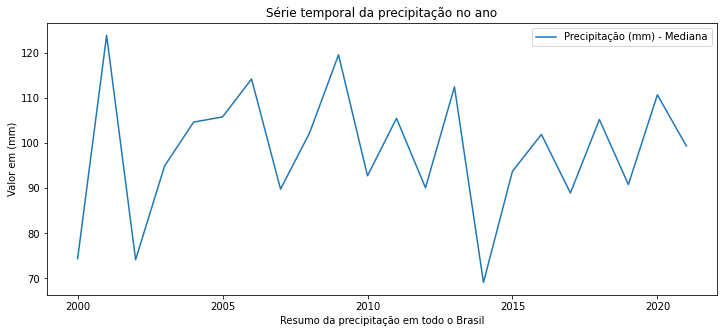

In [5]:
plt.figure(figsize = (12, 5)) 
sns.lineplot(x = 'Ano', 
             y = 'Precipitação (mm) - Mediana', 
             data = data_ano, 
             label = f'Precipitação (mm) - Mediana') 
plt.xlabel('Resumo da precipitação em todo o Brasil') 
plt.ylabel('Valor em (mm)')
plt.title('Série temporal da precipitação no ano')
plt.show()

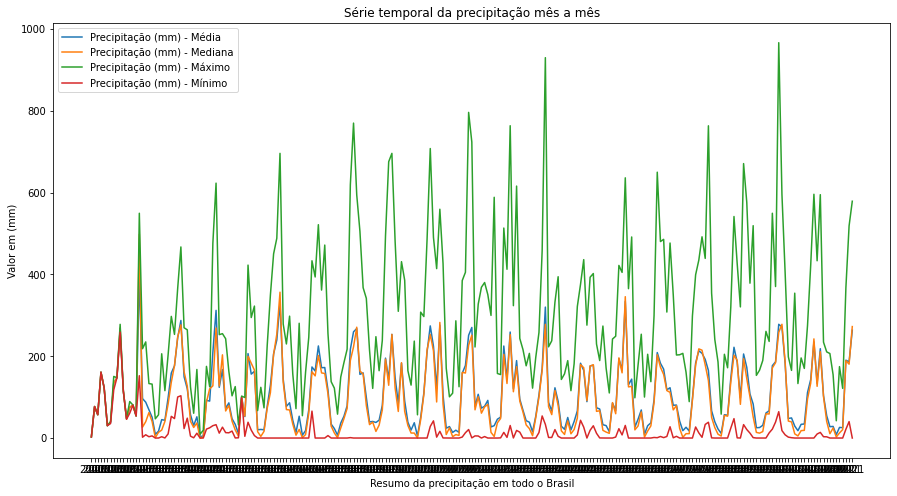

In [6]:
plt.figure(figsize = (15, 8)) 
for i in coluna_2:
    sns.lineplot(x = 'Ano-Mês', 
                 y = f'{i}', 
                 data = data, 
                 label = f'{i}') 
plt.xlabel('Resumo da precipitação em todo o Brasil') 
plt.ylabel('Valor em (mm)')
plt.title('Série temporal da precipitação mês a mês')
plt.xticks(data['Ano-Mês'],data['Ano'])
plt.show()